In [117]:
import numpy as np 
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
sns.set_palette('Set2')

import matplotlib.pyplot as plt
%matplotlib inline

import requests
import json
import datetime
import time

from sklearn.preprocessing import KBinsDiscretizer

In [167]:
file = 'CSV_for_EDA.csv'

In [168]:
df = pd.read_csv(file, index_col='date', parse_dates=True)

In [169]:
df.head()

,sales,covers,outside,apparent_temperature,humidity,precip_intensity_max,precip_max_time,precip_prob,precip_type,pressure,summary,temperature,day_of_week,month,closed,sales_per_cover
date,,,,,,,,,,,,,,,,
2017-01-02,12814.84,173.0,0,35.59,0.93,0.0243,03:00PM,0.74,rain,1027.76,rain,39.12,0,1,0,74.074220
2017-01-03,12442.11,184.0,0,41.72,0.95,0.0919,05:00PM,0.70,rain,999.38,rain,43.06,1,1,0,67.620163
2017-01-04,11877.64,176.0,0,35.07,0.37,0.0180,12:00AM,0.00,rain,1003.24,clear-night,41.16,2,1,0,67.486591
2017-01-05,14057.79,190.0,0,26.44,0.49,0.0000,05:01AM,0.00,none,1014.93,cloudy,31.49,3,1,0,73.988368
2017-01-06,14531.97,194.0,0,24.24,0.49,0.0023,12:00PM,0.00,snow,1023.22,partly-cloudy-night,29.02,4,1,0,74.907062


In [170]:
# Drop Closed Nights for EDA

df = df[df.closed == 0]

In [171]:
def clean_up_for_eda(df):

    temp_enc = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='kmeans')
    x = temp_enc.fit_transform(df[['apparent_temperature']])
    
    temp = pd.DataFrame(x, index=df.index)
    
    temp = temp.replace({0: 'very_cold',
                    1: 'cold',
                    2: 'warm',
                    3: 'hot',
                    4: 'very_hot'})
    
    df = df.merge(temp, on='date', how='left')
    
    df = df.rename(columns={0: 'temperature_bin'})
    
    df['outside'] = df['outside'].replace({0: 'outside_closed',
                              1: 'outside_open'})

    return df

df = clean_up_for_eda(df)

In [172]:
df

,sales,covers,outside,apparent_temperature,humidity,precip_intensity_max,precip_max_time,precip_prob,precip_type,pressure,summary,temperature,day_of_week,month,closed,sales_per_cover,temperature_bin
date,,,,,,,,,,,,,,,,,
2017-01-02,12814.84,173.0,outside_closed,35.59,0.93,0.0243,03:00PM,0.74,rain,1027.76,rain,39.12,0,1,0,74.074220,cold
2017-01-03,12442.11,184.0,outside_closed,41.72,0.95,0.0919,05:00PM,0.70,rain,999.38,rain,43.06,1,1,0,67.620163,warm
2017-01-04,11877.64,176.0,outside_closed,35.07,0.37,0.0180,12:00AM,0.00,rain,1003.24,clear-night,41.16,2,1,0,67.486591,cold
2017-01-05,14057.79,190.0,outside_closed,26.44,0.49,0.0000,05:01AM,0.00,none,1014.93,cloudy,31.49,3,1,0,73.988368,cold
2017-01-06,14531.97,194.0,outside_closed,24.24,0.49,0.0023,12:00PM,0.00,snow,1023.22,partly-cloudy-night,29.02,4,1,0,74.907062,cold
2017-01-07,16751.24,213.0,outside_closed,12.77,0.87,0.0004,01:00PM,0.00,none,1020.02,fog,20.73,5,1,0,78.644319,very_cold
2017-01-08,13628.09,189.0,outside_closed,11.49,0.51,0.0000,05:01AM,0.00,none,1032.84,clear-night,20.24,6,1,0,72.106296,very_cold
2017-01-09,12604.60,174.0,outside_closed,20.34,0.61,0.0000,05:01AM,0.00,none,1038.70,partly-cloudy-night,20.34,0,1,0,72.440230,very_cold
2017-01-10,13227.15,176.0,outside_closed,36.73,0.84,0.0046,11:00PM,0.00,rain,1027.90,cloudy,36.73,1,1,0,75.154261,cold


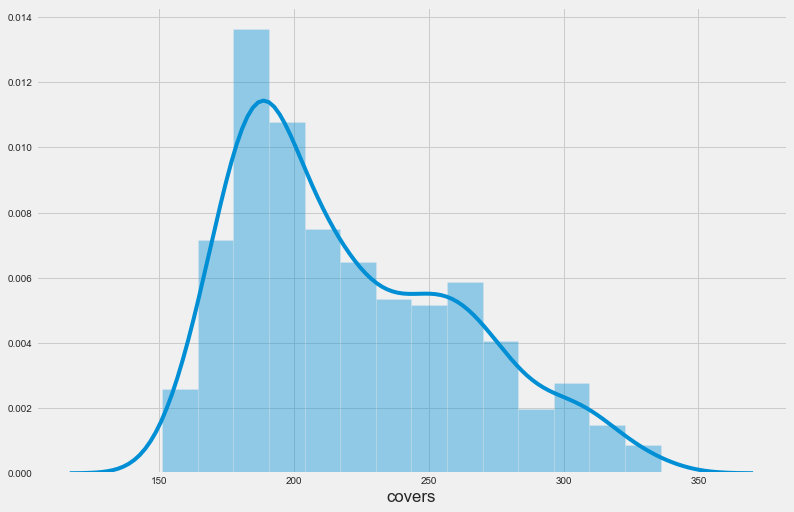

In [173]:
# Histogram of Property Value
plt.figure(figsize=(12,8))
sns.distplot(df['covers']);

In [174]:
df_ytd = df[df.index.month < 6] # Analyzing Months 1 through 5
dfm_total = df.resample('M').sum()
dfm_avg = df.resample('M').mean()

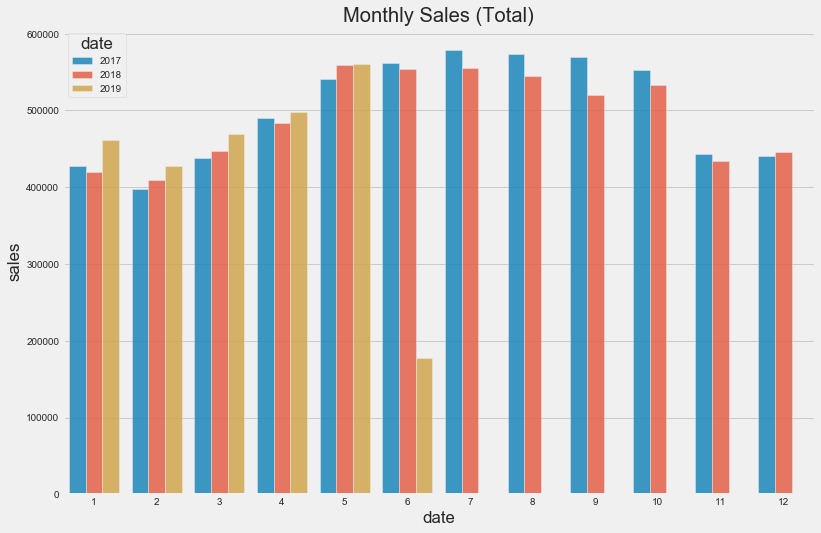

In [175]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,8))

sns.barplot(x=dfm_total.index.month, y='sales', hue=dfm_total.index.year, data=dfm_total, alpha=0.85, ci=False)
plt.title('Monthly Sales (Total)');

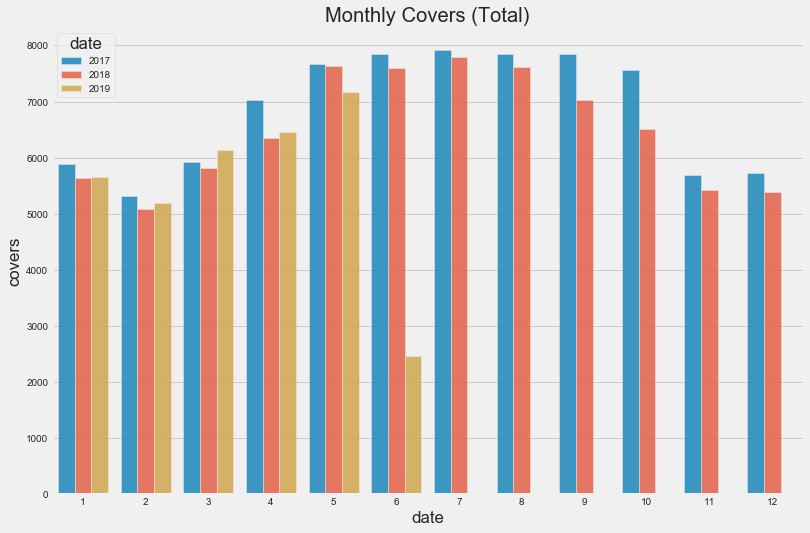

In [176]:
plt.figure(figsize=(12,8))
sns.barplot(x=dfm_total.index.month, y='covers', hue=dfm_total.index.year, data=dfm_total, alpha=0.85, ci=False)
plt.title('Monthly Covers (Total)');

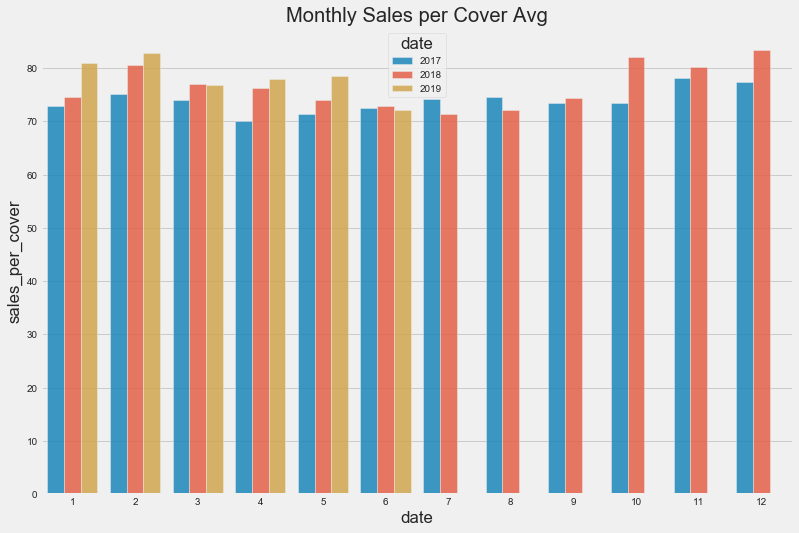

In [177]:
plt.figure(figsize=(12,8))
sns.barplot(x=dfm_avg.index.month, y='sales_per_cover', hue=dfm_avg.index.year, data=dfm_avg, alpha=0.85, ci=False)
plt.title('Monthly Sales per Cover Avg');

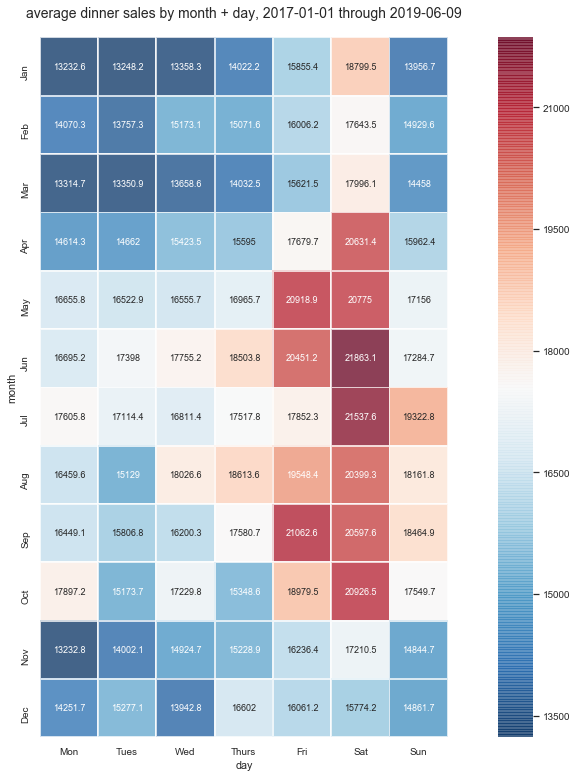

In [178]:
def sales_heatmap(df, start_date, end_date):
    
    sns.set_style('whitegrid')
    temp_df = df[(df.index > start_date) & (df.index < end_date)]
    
    matrix = temp_df.groupby([temp_df.index.month, temp_df.index.dayofweek]).agg({'sales': 'mean'})
    matrix = matrix.rename_axis(['month', 'day'])
    temp_df = matrix.unstack(level=1)

    plt.figure(figsize=(16,12))
    sns.set(font_scale=0.9)
    sns.set_style('whitegrid')
    sns.heatmap(temp_df, square=True, linewidths=0.75, annot=True, annot_kws={"size": 9}, fmt='g', 
                cmap='RdBu_r', alpha=0.75, yticklabels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
                xticklabels=['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
    plt.ylabel('month')
    plt.xlabel('day')
    plt.title(f'average dinner sales by month + day, {start_date} through {end_date}',size=14, pad=20)
    plt.show();
    
sales_heatmap(df, '2017-01-01', '2019-06-09')

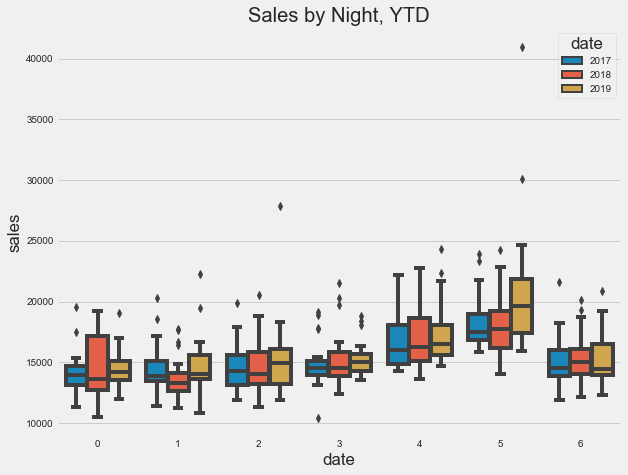

In [184]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(9,7))
sns.boxplot(x=df_ytd.index.dayofweek,
               y=df_ytd.sales,
               hue=df_ytd.index.year,
               data=df_ytd
                );

plt.title('Sales by Night, YTD');

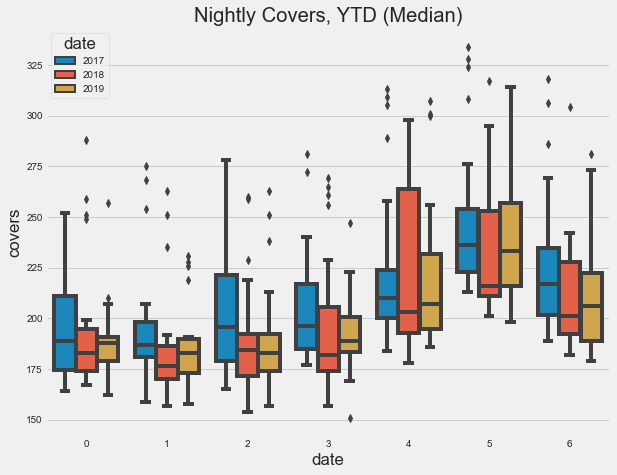

In [186]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(9,7))
sns.boxplot(x=df_ytd.index.dayofweek,
               y='covers',
               hue=df_ytd.index.year,
               data=df_ytd
                );

plt.title('Nightly Covers, YTD (Median)');

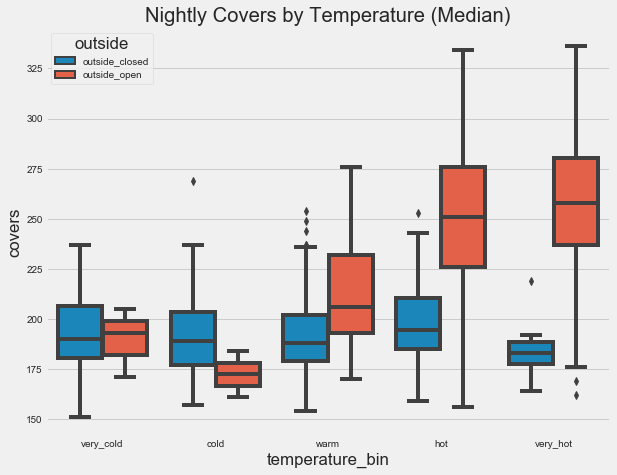

In [188]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(9,7))
sns.boxplot(x='temperature_bin',
               y='covers',
               hue='outside',
               data=df,
               order=['very_cold', 'cold', 'warm', 'hot', 'very_hot']
                );

plt.title('Nightly Covers by Temperature (Median)');

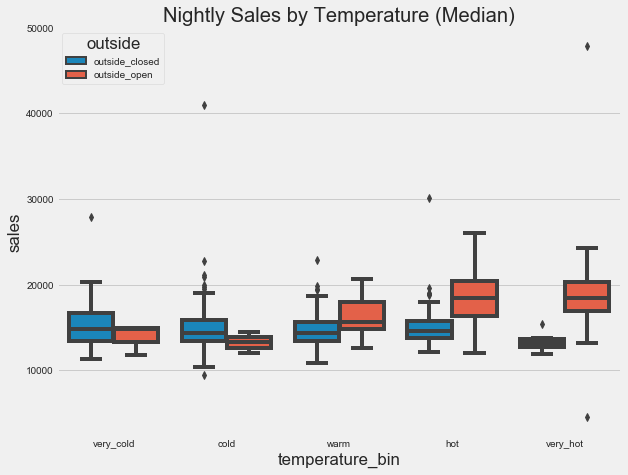

In [190]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(9,7))
sns.boxplot(x='temperature_bin',
               y='sales',
               hue='outside',
               data=df,
               order=['very_cold', 'cold', 'warm', 'hot', 'very_hot']
                );

plt.title('Nightly Sales by Temperature (Median)');

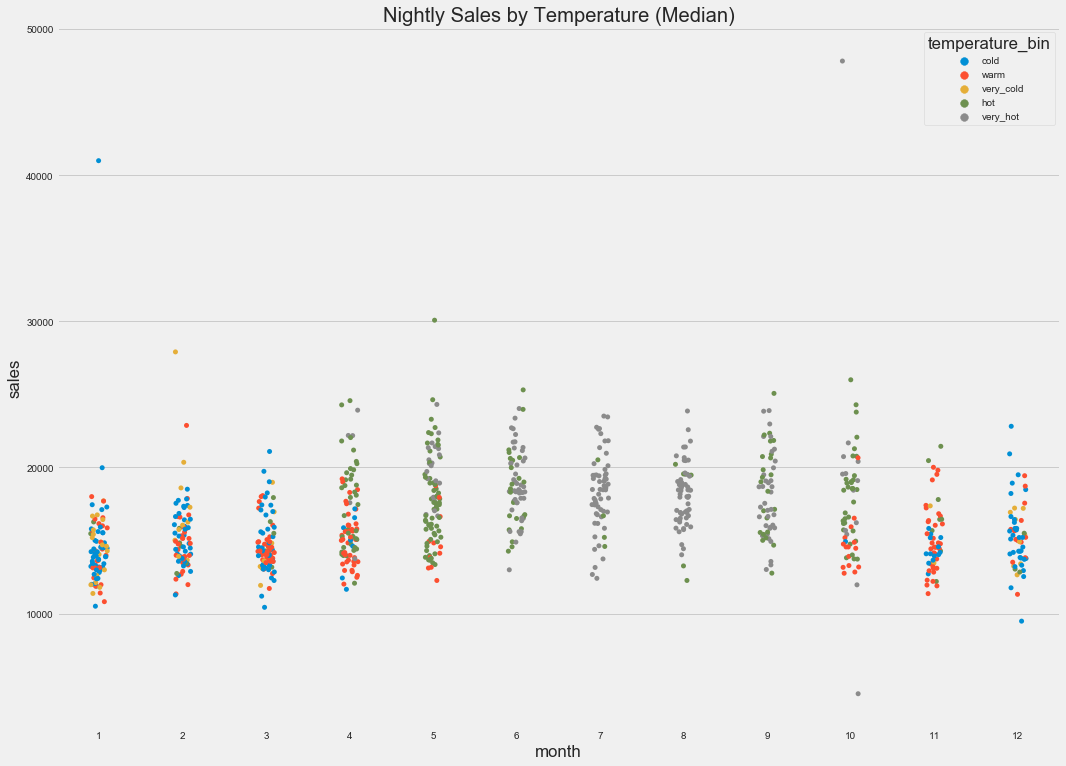

In [201]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(16,12))
sns.stripplot(x='month',
               y='sales',
               hue='temperature_bin',
               data=df
                );

plt.title('Nightly Sales by Temperature (Median)');

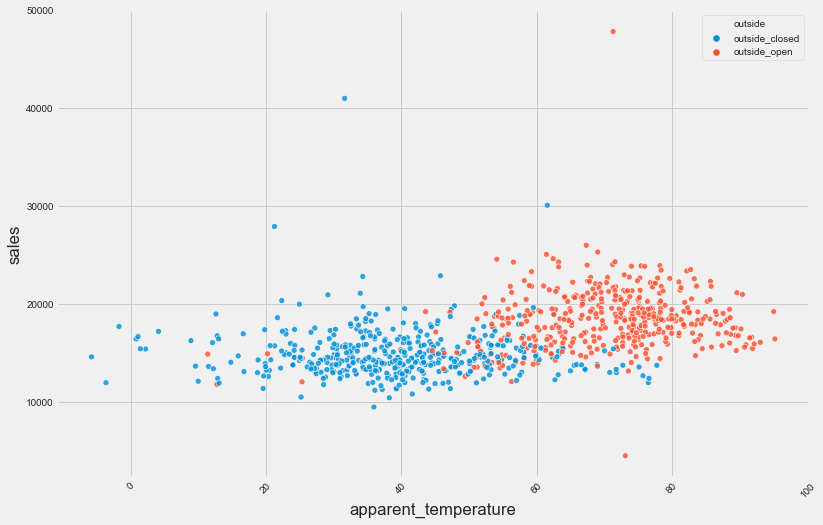

In [202]:
def scatter_plot(col_1, col_2, col_hue, data):
    
    plt.figure(figsize=(12,8))
    sns.scatterplot(x=col_1, y=col_2, hue=col_hue, data=data, alpha=.8)
    plt.xticks(rotation=45)
    plt.show();
    
scatter_plot('apparent_temperature', 'sales', 'outside', df)

In [ ]:
def scatter_plot(col_1, col_2, col_hue, data):
    
    plt.figure(figsize=(12,8))
    sns.scatterplot(x=col_1, y=col_2, hue=col_hue, data=data, alpha=.8)
    plt.xticks(rotation=45)
    plt.show();
    
scatter_plot('sales', 'apparent_temperature', 'outside', df)